### MNIST 데이터 살펴보기

In [3]:
import sys
import tensorflow as tf
import numpy as np

In [4]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


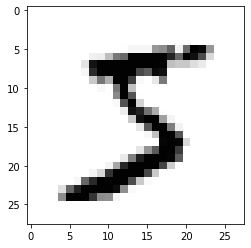

In [5]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [6]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### MLP 구조 만들기

In [7]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [8]:
print(f"Train Set : {X_train.shape}")
print(f"Test Set : {X_test.shape}")

Train Set : (60000, 784)
Test Set : (10000, 784)


In [9]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [10]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model 설계

In [11]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

### MLP Model 학습하기

In [13]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 1s 9ms/step - loss: 18.1541 - categorical_accuracy: 0.7752 - val_loss: 1.3042 - val_categorical_accuracy: 0.9072
Epoch 2/30
48/48 [==============================] - 0s 5ms/step - loss: 0.8531 - categorical_accuracy: 0.9236 - val_loss: 0.7760 - val_categorical_accuracy: 0.9242
Epoch 3/30
48/48 [==============================] - 0s 5ms/step - loss: 0.4249 - categorical_accuracy: 0.9482 - val_loss: 0.6171 - val_categorical_accuracy: 0.9350
Epoch 4/30
48/48 [==============================] - 0s 5ms/step - loss: 0.2369 - categorical_accuracy: 0.9638 - val_loss: 0.5527 - val_categorical_accuracy: 0.9402
Epoch 5/30
48/48 [==============================] - 0s 4ms/step - loss: 0.1355 - categorical_accuracy: 0.9749 - val_loss: 0.5070 - val_categorical_accuracy: 0.9440
Epoch 6/30
48/48 [==============================] - 0s 4ms/step - loss: 0.0745 - categorical_accuracy: 0.9847 - val_loss: 0.5054 - val_categorical_accuracy: 0.9442
Epoch 7/30
48/4

In [14]:
# Training loss 확인하기
loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

[18.154094696044922, 0.8531219363212585, 0.42490091919898987, 0.23689714074134827, 0.13547705113887787, 0.07449010759592056, 0.04256576672196388, 0.02425067126750946, 0.011759576387703419, 0.006030125077813864, 0.003046007128432393, 0.0017785566160455346, 0.001143804518505931, 0.000887761649210006, 0.0005555083625949919, 0.00047059953794814646, 0.00040717137744650245, 0.00036606681533157825, 0.00033751045702956617, 0.00031061595655046403, 0.0002906514273490757, 0.00027130122180096805, 0.0002536715765018016, 0.00023855360632296652, 0.00022530806018039584, 0.00021289466531015933, 0.00020050474267918617, 0.0001905663957586512, 0.00018114590784534812, 0.00017238066357094795]
[1.3041995763778687, 0.7759627103805542, 0.6171221733093262, 0.5526620149612427, 0.5070005059242249, 0.5054216384887695, 0.49707385897636414, 0.4827086925506592, 0.48175641894340515, 0.47300979495048523, 0.47270962595939636, 0.46765780448913574, 0.46729931235313416, 0.46976765990257263, 0.46821728348731995, 0.468014657

### 학습된 모델 성능 확인하기

In [15]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4109 - categorical_accuracy: 0.9522

 Test Accuracy: 0.9522


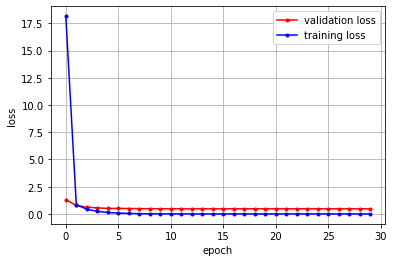

In [16]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()